In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Uses RTDS scheduler, partial CPU, no extra time, and no extra configuration on Flink
scheduler = 'rtds'
B = '75000'
P = '100000'
filename = '../../latencies/flink_kafka_' + scheduler + '_' + B + '_' + P + '_latency.txt'
print(filename)

../../latencies/flink_kafka_rtds_75000_100000_latency.txt


In [4]:
latencies = np.loadtxt(filename)

In [5]:
normalized = (latencies)/2.1
print(np.mean(normalized))

13163115.81842857


In [6]:
ms = normalized/1e6
print(np.mean(ms))

13.16311581842857


(0, 150)

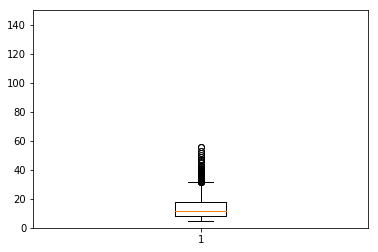

In [7]:
plt.boxplot(ms)
plt.ylim(0, 150)

Text(0,0.5,'Latency (ms)')

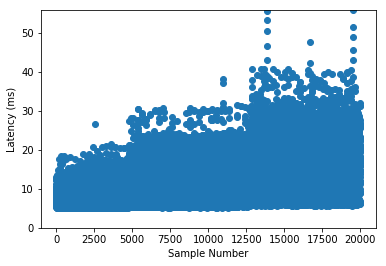

In [8]:
plt.scatter(range(latencies.shape[0]), ms)
plt.ylim(0, np.max(ms))
plt.xlabel('Sample Number')
plt.ylabel('Latency (ms)')

In [9]:
print(np.max(ms))

55.69025428571428


20000
0.75


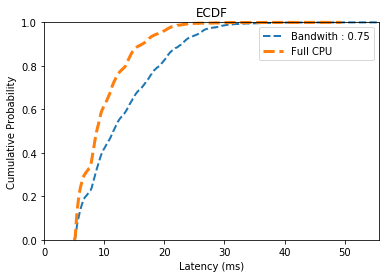

In [18]:
import statsmodels.api as sm

orig_file = '../../latencies/flink_kafka_rtds_100000_100000_latency.txt'
orig_latencies = np.loadtxt(orig_file)
orig_normalized = (orig_latencies)/2.1
orig_ms = orig_normalized/1e6
orig_ms = sorted(orig_ms)
print(len(orig_ms))

subsample = sorted(ms) # They have to be sorted

ecdf_f = sm.distributions.ECDF(subsample)
ecdf_orig = sm.distributions.ECDF(orig_ms)

y_f = ecdf_f(subsample)
y_orig = ecdf_orig(orig_ms)


plt.plot(subsample, y_f, linestyle='--', drawstyle='steps', clip_on=False, linewidth=2.0)
plt.plot(orig_ms, y_orig, linestyle='--', drawstyle='steps', clip_on=False, linewidth=3.0)
plt.xlim(0, max(np.max(subsample), np.max(orig_ms)))
plt.ylim(0, 1)
plt.xlabel('Latency (ms)')
plt.ylabel('Cumulative Probability')
plt.title('ECDF')
bw = float(int(B)/int(P))
plt.legend(['Bandwith : {}'.format(bw), 'Full CPU'])